# Miscellaneous features

## Timestamp

Give your file, group or dataset a timestamp by calling `.write_iso_timestamp()`

In [1]:
import h5rdmtoolbox as h5tbx

In [2]:
with h5tbx.File() as h5:
    h5.write_iso_timestamp()
    h5.dump()

## Working with time data

HDF5 cannot store `datetime` objects. The solution is to store them as string-datasets. Therefore, `datetime` is written to the HDF5 datasets in iso-format. When data is requested, it is converted back to `numpy.datetime64` format and fed into the `xarray` object. Note, that you may use the method `create_time_dataset` instead of constructing the string dataset yourself. In fact, this is recommended, because some attributes must be set in order to identify a dataset as a "time-data-dataset":

In [3]:
import datetime

In [4]:
with h5tbx.File() as h5:
    h5.create_time_dataset('time', data=[datetime.datetime.now(),
                                           datetime.datetime.now()+datetime.timedelta(hours=1),
                                           datetime.datetime.now()+datetime.timedelta(hours=3)],
                            attrs={'ISTIMEDS': True,
                                  'TIMEFORMAT': 'ISO'}, make_scale=True)
    h5.create_dataset('vel', data=[1,2,-3], attach_scale='time')
    v = h5.vel[()]
    t = h5.time[()]
    h5.dump()

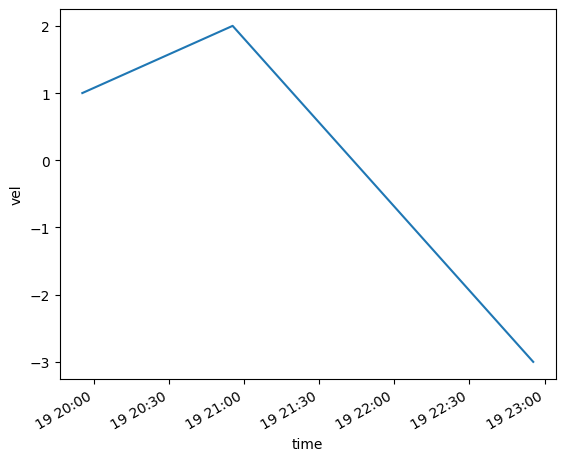

In [5]:
v.plot()

## Working with ontologies

Currently, the `h5rdmtoolbox` supports the usage of international resource identifiers (IRI) as used with ontologies.

An *IRI* can be assigned to attribute names and/or data.

In the following example, we create an HDF5 file and assign certain metadata to the root group and a dataset. For some of the metadata we know, that it is defined by an ontology:
- contact_person: http://w3id.org/nfdi4ing/metadata4ing#ContactPerson
- creator: http://w3id.org/nfdi4ing/metadata4ing#DataCollector
- units: https://qudt.org/schema/qudt/Unit

The attribute data for the roles "contact" and "creator" are *ORCID IDs*. This is something, which is also defined by the m4i (metadata4ing) ontology: http://w3id.org/nfdi4ing/metadata4ing#orcidId.

The below code shows how we can assign those IRIs to the attribute names and data, respectively. The syntax is mimicking the syntax of the `h5py.AttributeManager`:

In [6]:
with h5tbx.File(attrs={'title': 'test file'}) as h5:
    h5.attrs['contact_person'] = h5tbx.__author_orcid__
    h5.create_dataset('vel', data=[1,2,3], attrs={'units': 'm/s',
                                                  'creator': h5tbx.__author_orcid__,
                                                 'long_name': 'my velocity dataset'})
    h5.vel.attrs.create('random_attr', data=1)
    h5.iri['contact_person'].name = 'http://w3id.org/nfdi4ing/metadata4ing#ContactPerson'
    h5.iri['contact_person'].dat = 'http://w3id.org/nfdi4ing/metadata4ing#orcidId'
    h5.vel.iri['units'].name = 'https://qudt.org/schema/qudt/Unit'
    h5.vel.iri['creator'].name = 'http://w3id.org/nfdi4ing/metadata4ing#DataCollector'
    h5.vel.iri['creator'].data = 'http://w3id.org/nfdi4ing/metadata4ing#orcidId'

By associating the attribute names and/or data to *IRI*s we not only describe the metadata with persistent identifiers to be used by another software, the HTML-representation of the file content now also presents the *IRI*-icon. Clicking on it will open the link:

In [7]:
h5tbx.dump(h5.hdf_filename, collapsed=False)

**Removing** an attribute will not remove the associated *IRI*. The `del` call need to be performed on both objects:

In [8]:
with h5tbx.File(h5.hdf_filename, 'r+') as h5:
    del h5.vel.attrs['creator']
    del h5.vel.iri['creator']
    h5.dump(collapsed=False)